In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
!pip install statsmodels


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df_cars=pd.read_csv("car_prices.csv")
df_cars

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [4]:
df_cars=df_cars[df_cars["state"].str.len()<3]

In [5]:
state_dict = {
    "ca": "California",
    "tx": "Texas",
    "pa": "Pennsylvania",
    "mn": "Minnesota",
    "az": "Arizona",
    "wi": "Wisconsin",
    "tn": "Tennessee",
    "md": "Maryland",
    "fl": "Florida",
    "ne": "Nebraska",
    "nj": "New Jersey",
    "nv": "Nevada",
    "oh": "Ohio",
    "mi": "Michigan",
    "ga": "Georgia",
    "va": "Virginia",
    "sc": "South Carolina",
    "nc": "North Carolina",
    "in": "Indiana",
    "il": "Illinois",
    "co": "Colorado",
    "ut": "Utah",
    "mo": "Missouri",
    "ny": "New York",
    "ma": "Massachusetts",
    "or": "Oregon",
    "la": "Louisiana",
    "wa": "Washington",
    "hi": "Hawaii",
    "ok": "Oklahoma",
    "ms": "Mississippi",
    "nm": "New Mexico",
    "al": "Alabama",
    "pr": "Puerto Rico",
    "qc": "Quebec",          # Canada
    "ab": "Alberta",        # Canada
    "on": "Ontario",        # Canada
    "ns": "Nova Scotia"     # Canada
}


In [6]:
df_cars['body'] = df_cars['body'].astype(str).str.lower().str.strip()
df_cars['body']=df_cars['body'].str.capitalize()
df_cars['transmission'] = df_cars['transmission'].astype(str).str.lower().str.strip()
df_cars['make'] = df_cars['make'].astype(str).str.lower().str.strip()
df_cars['make'] = df_cars['make'].str.capitalize()
df_cars['make'].replace(['Vw','Mercedes-Benz','Mercedes-b','Mercedes-benz'],["Volkswagen","Mercedes",'Mercedes',"Mercedes"],inplace=True)
df_cars.loc[:, "state"] = df_cars["state"].replace(state_dict)
df_cars

C:\Users\ojasv\AppData\Local\Temp\ipykernel_24724\1485883875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cars['body'] = df_cars['body'].astype(str).str.lower().str.strip()
C:\Users\ojasv\AppData\Local\Temp\ipykernel_24724\1485883875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cars['body']=df_cars['body'].str.capitalize()
C:\Users\ojasv\AppData\Local\Temp\ipykernel_24724\1485883875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,Suv,automatic,5xyktca69fg566472,California,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,Suv,automatic,5xyktca69fg561319,California,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,Bmw,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,California,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,California,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,Bmw,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,California,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,nan,knalw4d4xf6019304,Indiana,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew cab,automatic,3c6td5et6cg112407,Washington,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,Bmw,X5,xDrive35d,Suv,automatic,5uxzw0c58cl668465,California,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap0fc216050,Georgia,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [ ]:
#[print(f"{x}: {df_cars[x].unique()}")for x in df_cars.columns]

In [ ]:
#[df_cars[x].value_counts()for x in df_cars.columns]

In [ ]:
#df_cars[(df_cars["body"]=='sedan') & (df_cars["make"]=='chevrolet')]

In [ ]:
#df_cars["make"].unique()

*saledate*

In [8]:
df_cars=df_cars.dropna(subset=["saledate"])

In [9]:
df_cars["saledate"]=df_cars["saledate"].apply(
    lambda x: datetime.strptime(
        x[:24], "%a %b %d %Y %H:%M:%S"
    ).date()
)

C:\Users\ojasv\AppData\Local\Temp\ipykernel_24724\1310018125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cars["saledate"]=df_cars["saledate"].apply(


In [10]:
df_cars["saledate"] = pd.to_datetime(df_cars["saledate"])

C:\Users\ojasv\AppData\Local\Temp\ipykernel_24724\632508879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cars["saledate"] = pd.to_datetime(df_cars["saledate"])


In [11]:
df_cars=df_cars[df_cars["year"]<=df_cars["saledate"].dt.year]

In [12]:
df_cars=df_cars.reset_index()
df_cars=df_cars.drop("index",axis=1)

In [13]:
df_cars["vehicle_age"] = (
    df_cars["saledate"].dt.year
    + df_cars["saledate"].dt.month / 12
    + df_cars["saledate"].dt.day / 365
    - df_cars["year"]
).round(3)


In [22]:
#df_cars.to_csv("cleaned_data.csv",index=False)

In [23]:
pd.read_csv("cleaned_data.csv")

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,vehicle_age
0,2014,Bmw,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,California,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-15,1.124
1,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,California,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-29,0.163
2,2014,Bmw,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,California,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18,1.049
3,2014,Bmw,M5,Base,Sedan,automatic,wbsfv9c51ed593089,California,34.0,14943.0,black,black,the hertz corporation,69000.0,65000.0,2014-12-17,1.047
4,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,California,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,2014-12-16,1.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558593,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,Indiana,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,2015-07-09,0.608
558594,2012,Ram,2500,Power Wagon,Crew cab,automatic,3c6td5et6cg112407,Washington,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,2015-07-08,3.605
558595,2012,Bmw,X5,xDrive35d,Suv,automatic,5uxzw0c58cl668465,California,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,2015-07-08,3.605
558596,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap0fc216050,Georgia,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,2015-07-09,0.608


*Highest Revenues*

In [65]:
g=df_cars.groupby("make")

In [66]:
ls={x[0]:x[1]['sellingprice'].sum() for x in g}

In [67]:
df_revenues=pd.DataFrame(ls.items(), columns=["make","revenue"]).set_index("make").sort_values("revenue", ascending=False)

In [68]:
df_revenues["revenue"] = df_revenues["revenue"].round(0)
pd.options.display.float_format = '{:,.0f}'.format

In [69]:
df_revenues

,revenue
make,
Ford,"1,362,430,882"
Chevrolet,"721,250,499"
Nissan,"633,524,255"
Toyota,"489,089,925"
Bmw,"445,873,713"
...,...
Chev truck,"2,000"
Ford truck,"1,450"
Daewoo,"1,200"


*Driving factor*

In [70]:
counts={x[0]:x[1]['vin'].count() for x in g}

In [71]:
sale_df=pd.DataFrame(counts.items(),columns=["make","sale(no of cars)"]).set_index("make")

In [72]:
driving_df=pd.merge(df_revenues,sale_df,on="make")

In [73]:
driving_df

,revenue,sale(no of cars)
make,,
Ford,"1,362,430,882",93988
Chevrolet,"721,250,499",60536
Nissan,"633,524,255",54001
Toyota,"489,089,925",39966
Bmw,"445,873,713",20772
...,...,...
Chev truck,"2,000",1
Ford truck,"1,450",3
Daewoo,"1,200",3


*Age sale price analysis*

In [94]:
pd.options.display.float_format = "{:.3f}".format

In [81]:
g=df_cars.groupby("make")[["vehicle_age","sellingprice"]]

In [137]:
df_cars["proxy_profit"]=df_cars["sellingprice"]-df_cars["mmr"]

In [141]:
df_cars["proxy_profit_percent"]=df_cars["proxy_profit"]/df_cars["mmr"]*100

In [142]:
df_cars["proxy_profit_percent"]

0         -5.956
1          0.909
2          1.515
3         -5.797
4        -17.647
           ...  
558593    -6.516
558594     1.987
558595    14.094
558596   -26.490
558597    -9.797
Name: proxy_profit_percent, Length: 558598, dtype: float64

*Used-Car Depreciation Analysis (Age & Mileage Based)*


In [102]:
sp_va_grp=df_cars[["make","sellingprice","vehicle_age"]].groupby("make")

In [104]:
plot_df = (
    df_cars
    .groupby(["make", "vehicle_age"], as_index=False)["sellingprice"]
    .mean()
)

In [119]:
top_ten=df_cars["make"].value_counts()[0:10]

In [124]:
t_ten_make=pd.DataFrame(top_ten).reset_index()["make"]

In [125]:
plot_df_filtered = plot_df[plot_df["make"].isin(t_ten_make)]

In [126]:
plot_df_filtered

,make,vehicle_age,sellingprice
2240,Bmw,0.119,39029.412
2241,Bmw,0.124,64000.000
2242,Bmw,0.138,27600.000
2243,Bmw,0.146,30000.000
2244,Bmw,0.157,36305.357
...,...,...,...
40128,Toyota,25.160,375.000
40129,Toyota,25.258,325.000
40130,Toyota,25.264,550.000
40131,Toyota,26.047,800.000


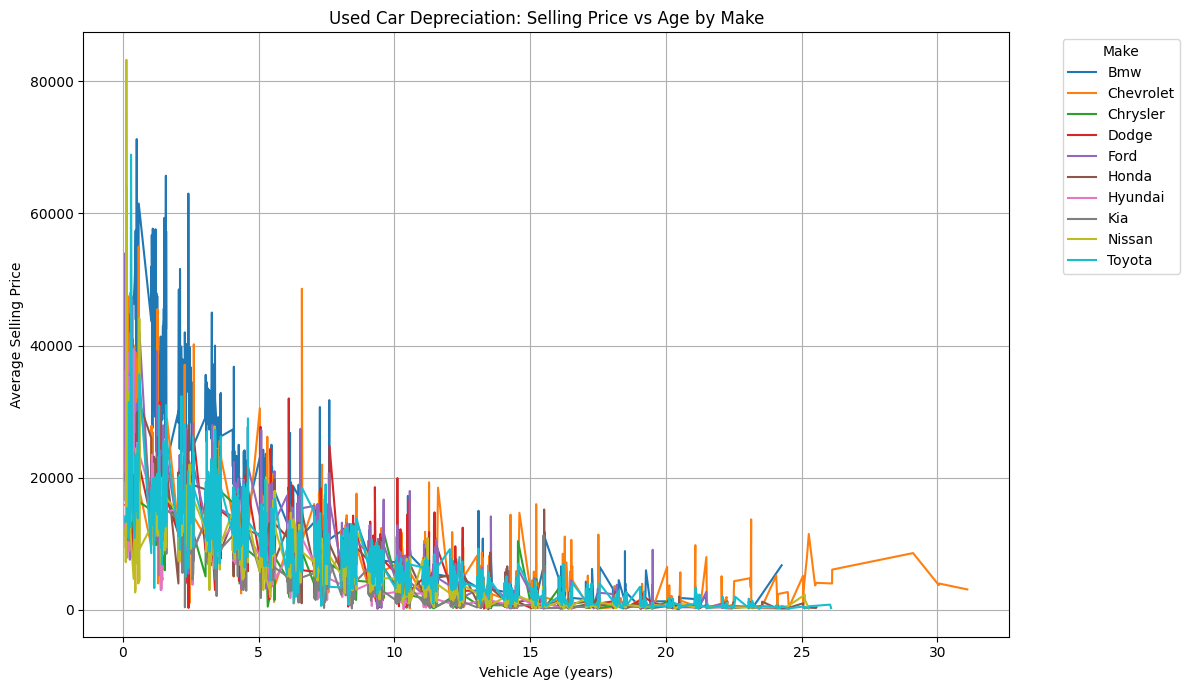

In [127]:
plt.figure(figsize=(12, 7))

for make, grp in plot_df_filtered.groupby("make"):
    plt.plot(
        grp["vehicle_age"],
        grp["sellingprice"],
        label=make
    )

plt.xlabel("Vehicle Age (years)")
plt.ylabel("Average Selling Price")
plt.title("Used Car Depreciation: Selling Price vs Age by Make")
plt.legend(title="Make", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

plt.tight_layout()
plt.show()

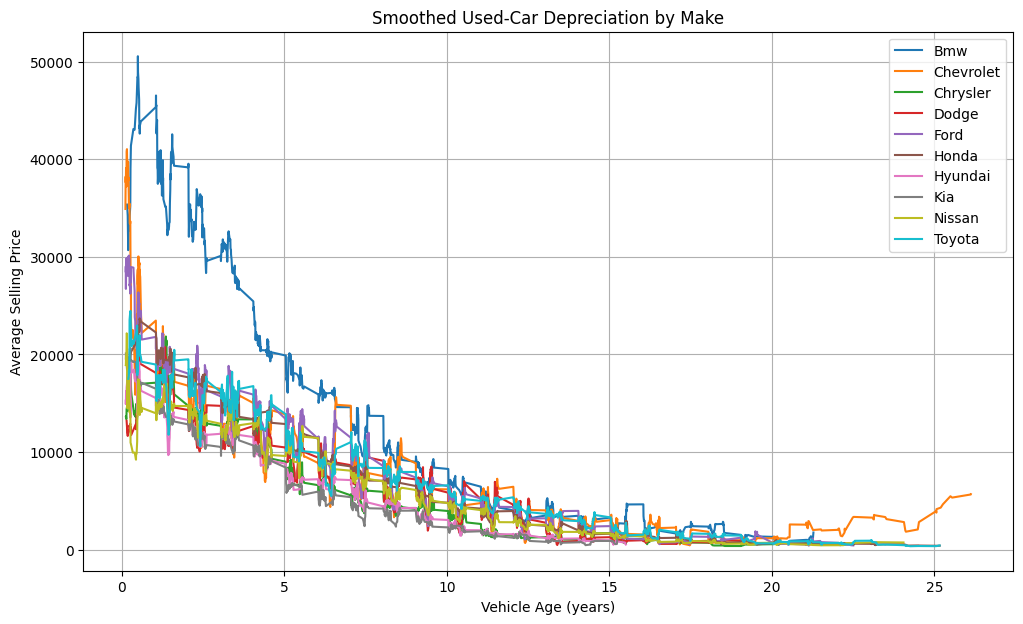

In [135]:
window = 10 

plt.figure(figsize=(12, 7))

for make, grp in plot_df_filtered.groupby("make"):
    grp = grp.sort_values("vehicle_age")
    smoothed = grp["sellingprice"].rolling(window=window, center=True).mean()

    plt.plot(grp["vehicle_age"], smoothed, label=make)

plt.xlabel("Vehicle Age (years)")
plt.ylabel("Average Selling Price")
plt.title("Smoothed Used-Car Depreciation by Make")
plt.legend()
plt.grid(True)
plt.show()

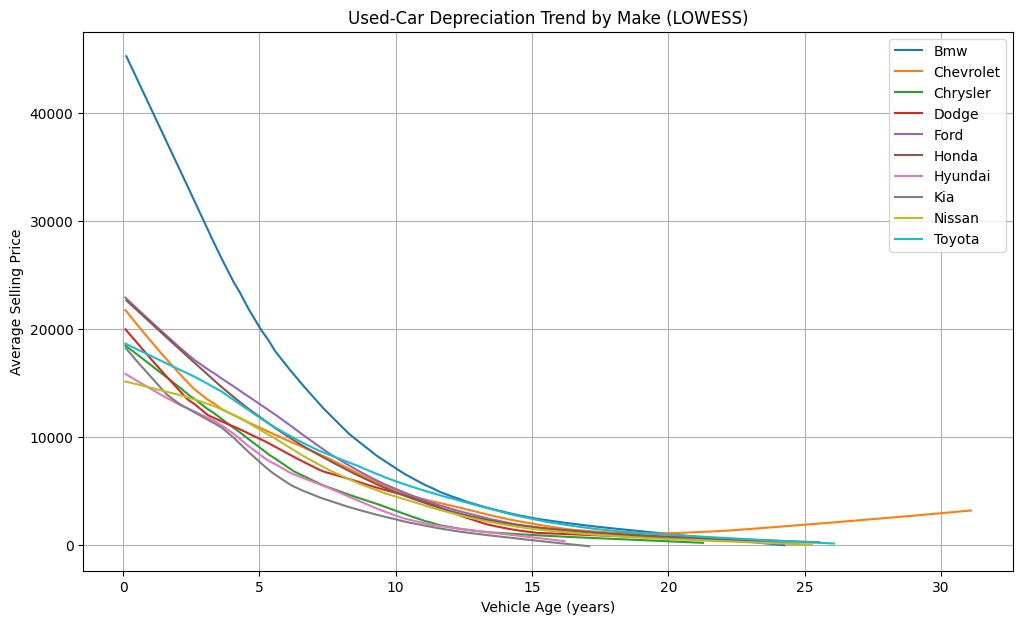

In [133]:
from statsmodels.nonparametric.smoothers_lowess import lowess

plt.figure(figsize=(12, 7))

for make, grp in plot_df_filtered.groupby("make"):
    grp = grp.sort_values("vehicle_age")
    smoothed = lowess(
        grp["sellingprice"],
        grp["vehicle_age"],
        frac=0.3  # smoothing strength (0.2–0.4 works well)
    )

    plt.plot(smoothed[:, 0], smoothed[:, 1], label=make)

plt.xlabel("Vehicle Age (years)")
plt.ylabel("Average Selling Price")
plt.title("Used-Car Depreciation Trend by Make (LOWESS)")
plt.legend()
plt.grid(True)
plt.show()

*states contribute*

In [179]:
state_brand_df=df_cars.groupby(["state", "make"],as_index=False)["sellingprice"].mean()
state_brand_no_df=(df_cars.groupby(["state","make"],as_index=False).size().rename(columns={"size": "units_sold"}))
state_brand_df=pd.merge(state_brand_df,state_brand_no_df, on=["state", "make"])
#state_brand_df["avg_price"]=state_brand_df["sellingprice"]/state_brand_df["units_sold"]
state_brand_df=state_brand_df.sort_values("units_sold", ascending=False)

In [156]:
#profit_per_df=df_cars.groupby(["state", "make"],as_index=False)["proxy_profit_percent"].mean()

In [180]:
df_mixed=df_cars.groupby(["state", "make"],as_index=False)[["mmr","proxy_profit", "proxy_profit_percent","vehicle_age","odometer"]].mean()

In [181]:
state_brand_df=pd.merge(state_brand_df,df_mixed, on=["state", "make"])

In [160]:
plot_df_profits = (
    df_cars
    .groupby(["make", "vehicle_age"], as_index=False)["proxy_profit_percent"]
    .mean()
)

In [186]:
state_brand_df=state_brand_df[(state_brand_df["proxy_profit_percent"]>-50) & (state_brand_df["proxy_profit_percent"]<50)]

In [187]:
plot_df_profits_filtered = plot_df_profits[plot_df_profits["make"].isin(t_ten_make)]

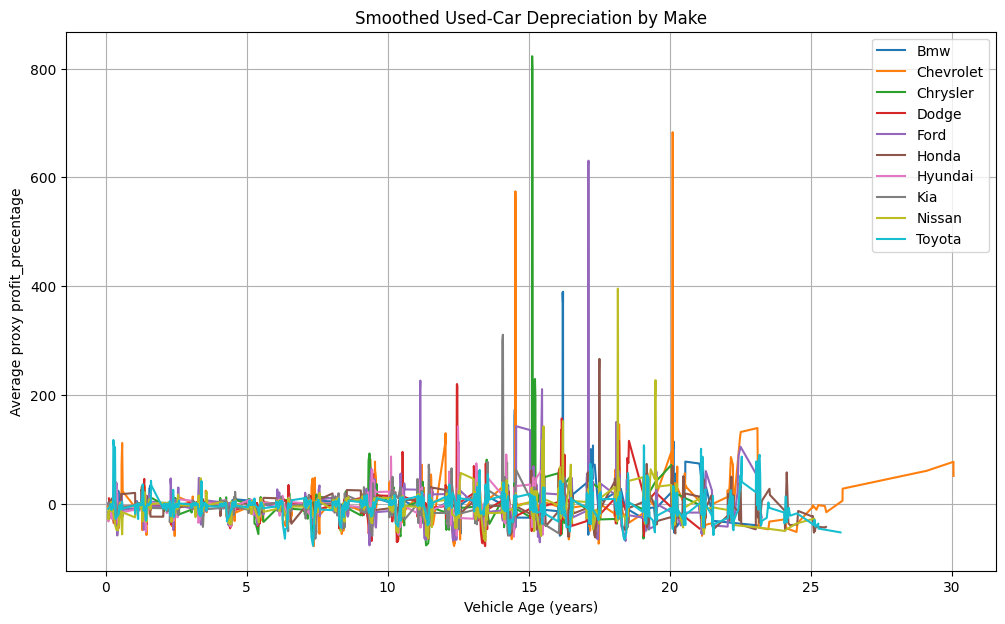

In [188]:
window = 3

plt.figure(figsize=(12, 7))

for make, grp in plot_df_profits_filtered.groupby("make"):
    grp = grp.sort_values("vehicle_age")
    smoothed = grp["proxy_profit_percent"].rolling(window=window, center=True).mean()

    plt.plot(grp["vehicle_age"], smoothed, label=make)

plt.xlabel("Vehicle Age (years)")
plt.ylabel("Average proxy profit_precentage")
plt.title("Smoothed Used-Car Depreciation by Make")
plt.legend()
plt.grid(True)
plt.show()

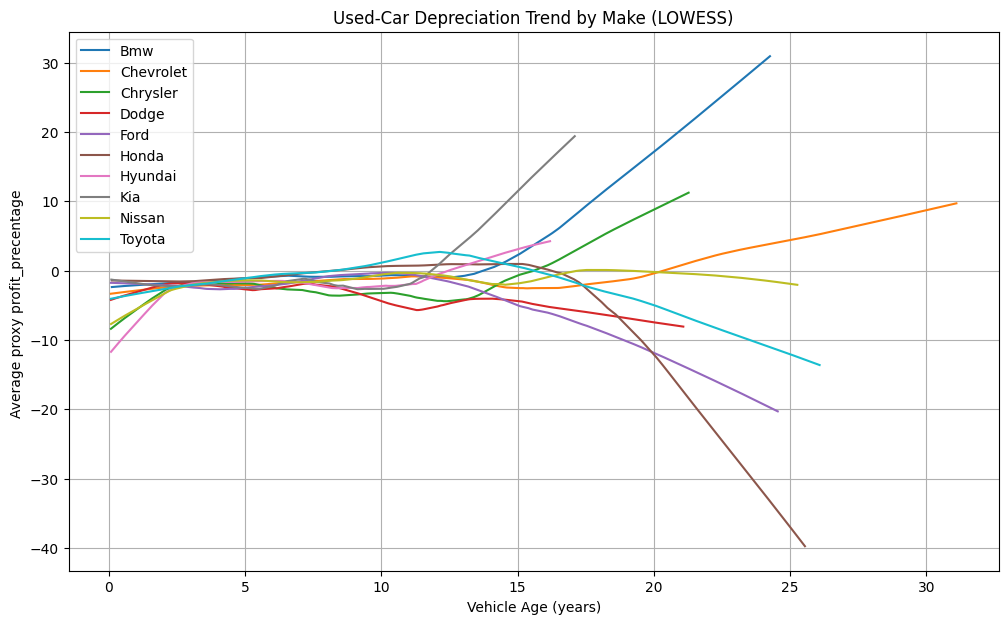

In [189]:
from statsmodels.nonparametric.smoothers_lowess import lowess

plt.figure(figsize=(12, 7))

for make, grp in plot_df_profits_filtered.groupby("make"):
    grp = grp.sort_values("vehicle_age")
    smoothed = lowess(
        grp["proxy_profit_percent"],
        grp["vehicle_age"],
        frac=0.3  
    )

    plt.plot(smoothed[:, 0], smoothed[:, 1], label=make)

plt.xlabel("Vehicle Age (years)")
plt.ylabel("Average proxy profit_precentage ")
plt.title("Used-Car Depreciation Trend by Make (LOWESS)")
plt.legend()
plt.grid(True)
plt.show()

In [82]:
max_rev_per_state=(state_brand_df.loc[state_brand_df.groupby("state")["sellingprice"].idxmax()].reset_index(drop=True))

In [83]:
max_rev_per_state.rename(columns={"sellingprice": "total_sale_amt"}, inplace=True)

In [84]:
max_rev_per_state

,state,make,total_sale_amt,units_sold,avg_price
0,Alabama,Dodge,"50,300",4,"12,575"
1,Alberta,Ford,"3,294,300",245,"13,446"
2,Arizona,Chevrolet,"16,370,425",1388,"11,794"
3,California,Bmw,"123,979,971",5569,"22,263"
4,Colorado,Ford,"26,440,356",1535,"17,225"
5,Florida,Ford,"147,442,337",10731,"13,740"
6,Georgia,Ford,"74,701,568",5091,"14,673"
7,Hawaii,Ford,"2,469,400",197,"12,535"
8,Illinois,Ford,"98,432,233",5717,"17,217"
9,Indiana,Honda,"7,629,150",395,"19,314"


In [85]:
state_group=df_cars.groupby("state")

state_rev={x[0]:x[1]["sellingprice"].sum() for x in state_group}

total_state_sale_df=pd.DataFrame(state_rev.items(),columns=["state","total_sales"]).set_index("state").sort_values("total_sales",ascending=False)

no_of_cars={x[0]:x[1]['vin'].count()for x in state_group}

cars_state_df=pd.DataFrame(no_of_cars.items(),columns=["state","no_of_cars"]).set_index("state")

cars_state_df=pd.merge(total_state_sale_df,cars_state_df,on="state")

cars_state_df["avg_val"]=cars_state_df["total_sales"]/cars_state_df["no_of_cars"]

cars_state_df.sort_values("avg_val",ascending=False)

,total_sales,no_of_cars,avg_val
state,,,
Ontario,"61,311,050",3442,"17,813"
Tennessee,"355,114,508",20887,"17,002"
Pennsylvania,"860,898,673",53897,"15,973"
Colorado,"123,406,585",7773,"15,876"
Nevada,"191,337,588",12675,"15,096"
Michigan,"230,847,627",15509,"14,885"
Illinois,"347,247,026",23477,"14,791"
California,"1,059,880,927",73089,"14,501"
Missouri,"231,647,138",16013,"14,466"


In [86]:
state_players={x[0]:x[1]["make"].value_counts() for x in state_group}
    

In [87]:
df=pd.DataFrame(state_players)

In [88]:
big_player={}
for col in df.columns:
    big_player[col]={
         "max_brand_by_no": df[col].idxmax(),
        "max_no": df[col].max()
    }

    

In [90]:
big_player_df=pd.DataFrame(big_player).transpose()

,max_brand_by_no,max_no
Florida,Ford,10731.000
Texas,Ford,9573.000
California,Ford,8904.000
Pennsylvania,Ford,6447.000
Illinois,Ford,5717.000
Michigan,Ford,5578.000
Missouri,Ford,5457.000
Tennessee,Ford,5306.000
Georgia,Ford,5091.000
New Jersey,Nissan,4434.000
